---
---
### UNaB: Universidad Nacional Guillermo Brown
#### Inferencia estadística y reconocimiento de patrones

## Prof: Sebastian Simondi
# Alumnos : Lucas León González - David Lobos - Euler Diego




### Parcial N°2 - 26/11/2024
* El dataset kmeans.csv contiene un total de 100 entradas y tres columnas, cada una representando una dimensión en un espacio tridimensional. Las columnas, etiquetadas como X, Y y Z, contienen datos de tipo float64.

----
----

##           Ingesta y limpieza de datos

---





In [ ]:
# 1 . IMPORTAR LAS LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuración de estilo
sns.set(style='whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('kmeans.csv')

Saving kmeans.csv to kmeans.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
 2   Z       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [ ]:
# Las 5 primeras filas
df.head()

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071


In [ ]:
# Las ultimas 5 filas
df.tail()

,X,Y,Z
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587
99,0.014823,0.000183,1.013027


In [ ]:
# 3. REVISAR LOS TIPOS DE DATOS
df.dtypes


,0
X,float64
Y,float64
Z,float64


In [ ]:
# 4. Eliminar los duplicados
print(f'Original: {df.count()} filas')
duplicate_rows_df =df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.count()}')

# Eliminar los duplicados
df = df.drop_duplicates()

Original: X    100
Y    100
Z    100
dtype: int64 filas
Cantidad de filas duplicadas: X    2
Y    2
Z    2
dtype: int64


In [ ]:
#Filas despues de eliminar los duplicados
print(f'Original: {df.count()} filas')

Original: X    98
Y    98
Z    98
dtype: int64 filas


In [ ]:
print(df.columns)

Index(['X', 'Y', 'Z'], dtype='object')


In [ ]:
# 7. ELIMINAR LOS VALORES PERDIDOS O NULOS
#Encontrar los valores nulos
print(df.isnull().sum())

#Eliminar los valores perdidos
df = df.dropna()
print()

#Despues de eliminar los nulos
print(df.isnull().sum())

X    0
Y    0
Z    0
dtype: int64

X    0
Y    0
Z    0
dtype: int64


In [ ]:
df

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071
...,...,...,...
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587


----
----
### Análisis Exploratorio de Datos (EDA)
----

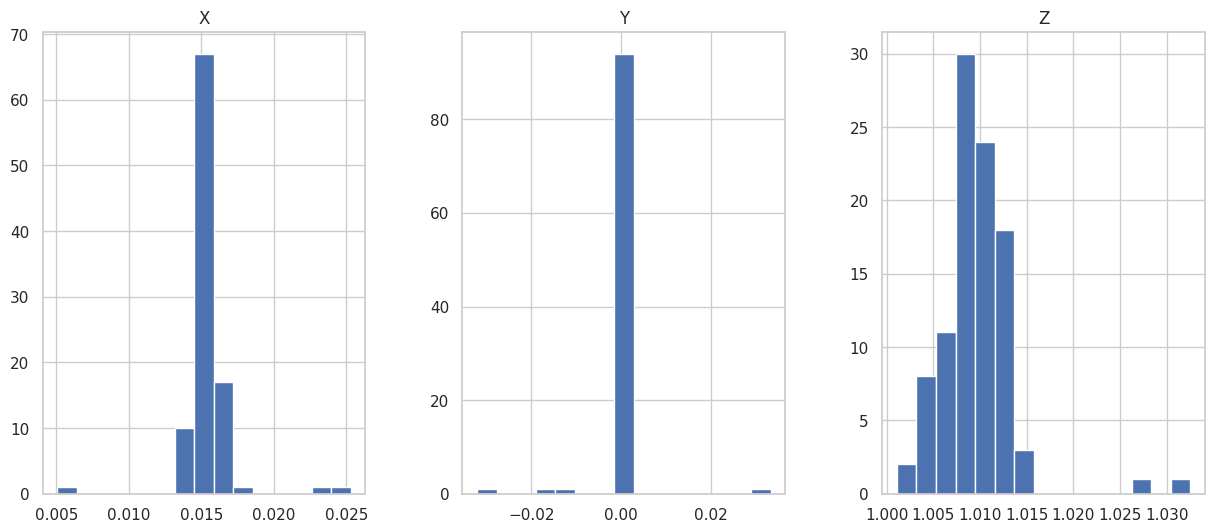

In [ ]:
# Histograma para cada columna
df.hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.show()


### Análisis Individual de los Histogramas

1. Variable X:

* Distribución: La variable X presenta una distribución claramente sesgada hacia la derecha. La mayoría de los valores se concentran en un rango bajo, con una cola larga hacia la derecha que indica la presencia de algunos valores atípicos más altos.
* Interpretación: Esto sugiere que la mayoría de las observaciones para la variable X tienden a tomar valores pequeños, pero hay una minoría significativa de casos donde los valores son mucho más grandes.
2. Variable Y:

* Distribución: La variable Y muestra una distribución muy concentrada alrededor de cero, con una forma casi simétrica. La mayoría de los valores se encuentran muy cerca del valor central.
*Interpretación: Esta distribución indica que la variable Y tiene una variabilidad muy baja y que la mayoría de las observaciones están muy próximas a su valor medio.
3. Variable Z:

* Distribución: La variable Z presenta una distribución unimodal y ligeramente sesgada hacia la izquierda. La mayoría de los valores se concentran en un rango medio, con una cola más larga hacia la izquierda.
* Interpretación: Esto sugiere que la variable Z tiene una tendencia a tomar valores moderados, aunque hay algunos casos donde los valores son más bajos.

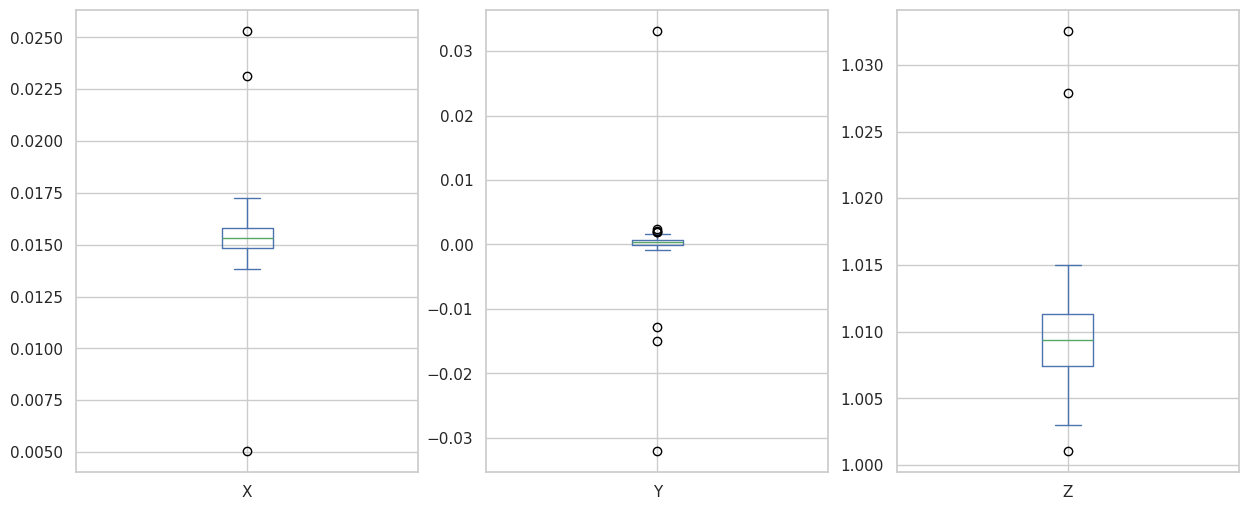

In [ ]:
# Boxplot para cada columna
df.plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 6), sharex=False, sharey=False)
plt.show()

### Análisis de los Diagramas de Caja (Box Plots) de las Variables X, Y y Z



1. Variable X:

* Dispersión: La variable X presenta una mayor dispersión de datos en comparación con las otras dos variables. El rango intercuartílico es más amplio, lo que indica que los valores están más distribuidos.
* Valores atípicos: Se observan valores atípicos tanto en la parte superior como en la inferior del diagrama, lo que sugiere la presencia de algunos datos extremos.
* Simetría: La mediana se encuentra ligeramente por encima del centro de la caja, lo que indica una ligera asimetría positiva (cola a la derecha).
2. Variable Y:

* Dispersión: La variable Y presenta una menor dispersión en comparación con la variable X. El rango intercuartílico es más estrecho, lo que indica que los valores están más concentrados alrededor de la mediana.
* Valores atípicos: Se observan algunos valores atípicos en la parte superior e inferior del diagrama, aunque en menor medida que en la variable X.
* Simetría: La mediana se encuentra aproximadamente en el centro de la caja, lo que sugiere una distribución más simétrica.
3. Variable Z:

* Dispersión: La variable Z presenta una dispersión similar a la variable Y. El rango intercuartílico es relativamente estrecho.
* Valores atípicos: Se observa un valor atípico en la parte superior del diagrama.
* Simetría: La mediana se encuentra ligeramente por debajo del centro de la caja, lo que indica una ligera asimetría negativa (cola a la izquierda).

In [ ]:



# Mostrar la cantidad de filas antes de eliminar outliers
print(f'Antes: {df.shape[0]} filas\n')

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[float, int])

# Calcular los cuartiles y el IQR para cada columna numérica
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

print("IQR para cada columna:\n", IQR)

# Filtrar los outliers en todas las columnas numéricas
df_filtered = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar la cantidad de filas después de eliminar outliers
print(f'\nDespués: {df_filtered.shape[0]} filas')


Antes: 98 filas

IQR para cada columna:
 X    0.000976
Y    0.000732
Z    0.003904
dtype: float64

Después: 89 filas


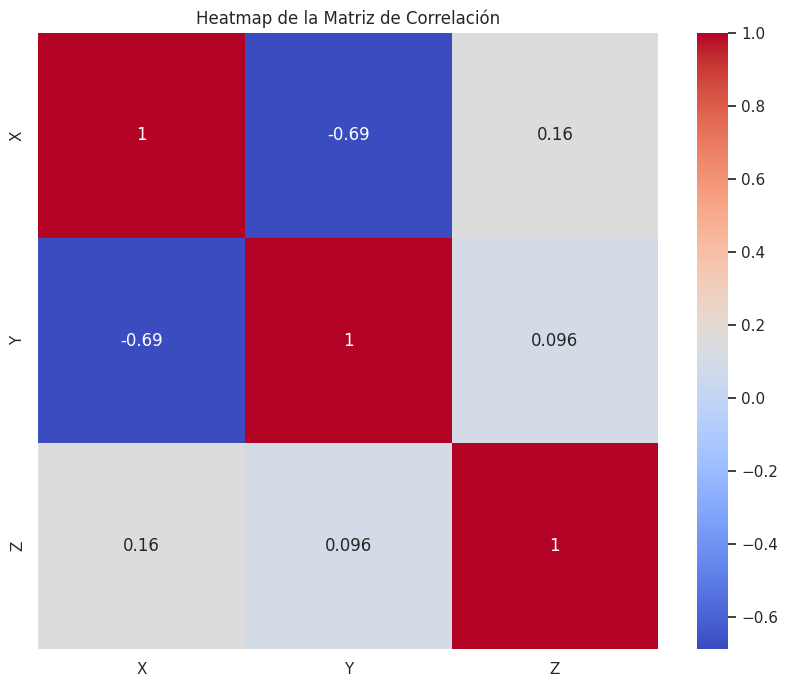

In [ ]:
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de la Matriz de Correlación')  # Agregar título al heatmap
plt.show()

### Conclusiones
* Relación inversa entre X e Y: La correlación negativa fuerte entre X e Y sugiere que estas dos variables están inversamente relacionadas. Cuando una aumenta, la otra tiende a disminuir.
* Débil relación entre X y Z, y Y y Z: Las correlaciones positivas débiles entre X y Z, y entre Y y Z indican que existe una relación positiva leve entre estas variables, pero es muy débil y podría considerarse casi nula.


-----
# Análisis de componentes principales PCA
----

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Preprocesamiento (escalar los datos)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [ ]:
#  Realización de PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

In [ ]:
# Porcentaje de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Porcentaje de varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance)

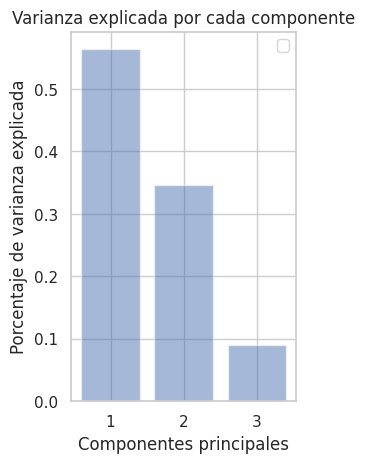

In [ ]:
# Porcentaje de varianza explicada por cada componente
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Varianza explicada por cada componente')
plt.legend()

####Conclusiones
* Dominancia del primer componente: El primer componente principal es claramente el más importante, capturando más de la mitad de la varianza total.
* Importancia de los primeros dos componentes: Juntos, los dos primeros componentes explican alrededor del 90% de la variabilidad. Esto indica que al reducir la dimensionalidad del conjunto de datos a solo dos componentes principales, se está conservando una gran parte de la información original.
* Diminuto aporte del tercer componente: El tercer componente, aunque presente, aporta una proporción relativamente pequeña de la varianza. Esto sugiere que las dimensiones adicionales más allá de las dos primeras no aportan mucha información nueva.

In [ ]:
# Elegimos el número de componentes que explique la mayor parte de la varianza (por ejemplo, 2 componentes)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

----
# K-means clustering
----

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Implementar K-means Clustering
# Determinar el número óptimo de clusters usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

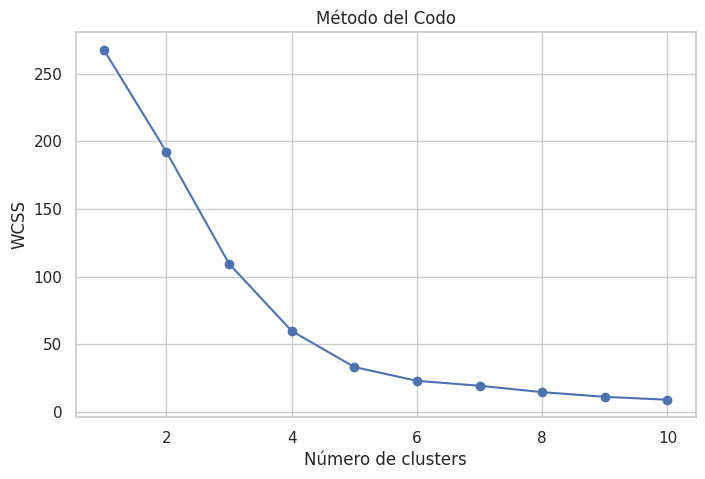

In [ ]:
# Gráfico del Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('Método del Codo')
plt.show()

* El punto donde la curva se "dobla" o forma un "codo" se considera un buen indicador del número óptimo de clusters.
* En este caso, el codo parece estar alrededor de los 4 clusters.
* Esto sugiere que al agrupar los datos en 4 clusters, se logra un buen equilibrio entre la reducción de la varianza dentro de los clusters y la simplicidad del modelo.

In [ ]:
# Aplicar K-means con el número óptimo de clusters (e.g., 4 clusters)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_pca)

In [ ]:
# Añadir la información de los clusters al dataframe original
df['Cluster'] = clusters

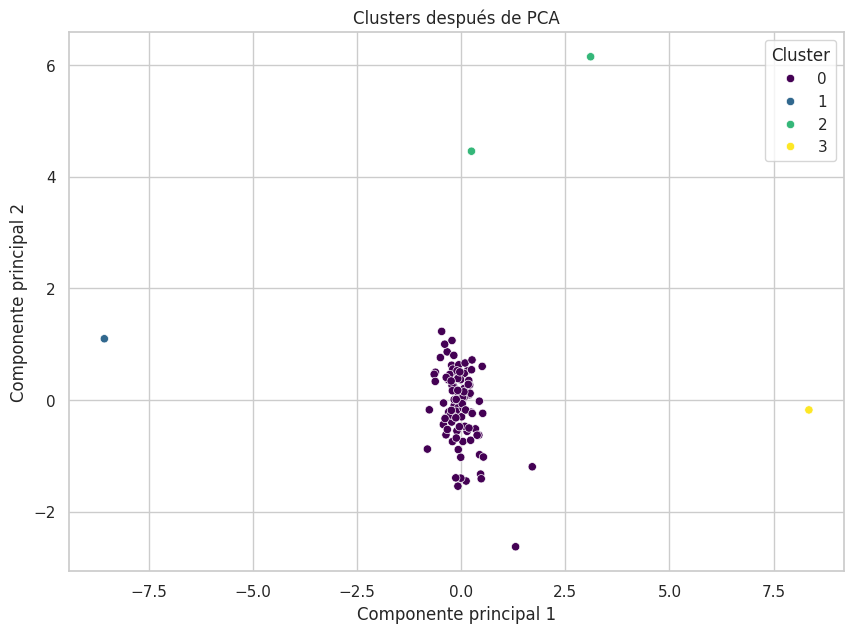

In [ ]:
# Visualización de los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters después de PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Cluster')
plt.show()

### Interpretación de los resultados
* Agrupamiento: El gráfico muestra claramente que los datos se han agrupado en cuatro clusters distintos (representados por los diferentes colores). Esto sugiere que las observaciones dentro de cada cluster son más similares entre sí que las observaciones de diferentes clusters.
* Separación de los clusters: La mayoría de los clusters parecen estar bien separados, lo que indica que el algoritmo de clustering ha logrado identificar grupos distintos en los datos. Sin embargo, hay algunos puntos que parecen estar más cercanos a los límites entre los clusters, lo que podría indicar cierta incertidumbre en su asignación.